In [1]:
from sklearn.naive_bayes import MultinomialNB # A form of Naive bayes model, best for 2 or more classes for target variable
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE # for handling imbalanced classes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_predict,StratifiedKFold
from imblearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

import warnings
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
Spam_df = pd.read_csv('03_Spam_Preprocess_Phase.csv')

In [3]:
Spam_df.head()

,Result,num_chars,num_words,num_spec_chars,num_digits,num_Uppercase_Words,num_URLS,num_Emails,num_Sus_Words,aah,...,zebra,zed,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk
0,0,111,20,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,29,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,155,27,6,25,4,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,49,11,6,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,61,13,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2> Modeling</h2>

During the modeling phase we will be doing A/B testing by doing the following:

1. Train the naive bayes and logistic regression model on the dataset as it is, evaluate and compare results between the two models
2. Apply SMOTE on the dataset and then train new naive bayes and logistic regression models on this new dataset and compare to each other again.

The purpose of doing this is to test if engineering enough robust features can effectively eliminate or reduce the effects of class imbalance.   

My reasoning for this is that imbalanced classes cause issues during modeling because the model can favor one class over another due to the size of one class eclipsing another. However, if given enough features that help to describe the minority class thoroughly , I think this shouldn't continue to be an issue.

<h3>Pre-SMOTE Modeling</h3>

In [4]:
# lets make the features and target variables
Y = Spam_df['Result']
X = Spam_df.drop(['Result'],axis = 1)

In [5]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4,random_state=42) #80% of training, 20% for testing

In [6]:
# Lets make the models
Bayes = MultinomialNB()
LogReg = LogisticRegression()

<h4> Naive Bayes training and testing</h4>

In [7]:
Y_pred = cross_val_predict(Bayes, X, Y, cv=5)

In [8]:
precision_Bayes = precision_score(Y, Y_pred, average='binary', pos_label=1)  
recall_Bayes = recall_score(Y, Y_pred, average='binary',pos_label=1)       
f1_Bayes = f1_score(Y, Y_pred, average='binary',pos_label=1)               

print("Precision:", precision_Bayes)
print("Recall:", recall_Bayes)
print("F1-score:", f1_Bayes)

Precision: 0.9556786703601108
Recall: 0.9236947791164659
F1-score: 0.9394145677331518


Based on the cross-validation performed, it seems our naive bayes model performs well on its own without applying SMOTE. We used 'binary' and 'pos_label =1' in our metrics for Precision, Recall and F1 to speccifically judge if the model performs well at finding and identifying spam.  

If we had used 'weighted' the results would be good for **generalization** but the ham class being 87% of the dataset could could give a false sense of success.

In [9]:
#Im going to go on and train the bayes model on the entire dataset 
#and see how well it performs from there, the cross_val_predict doesnt traina and save the model
Bayes.fit(X,Y)

MultinomialNB()

In [10]:
Y_Pred_Final = Bayes.predict(X)

In [11]:
precision_Bayes_Final = precision_score(Y, Y_Pred_Final, average='binary', pos_label=1)  
recall_Bayes_Final = recall_score(Y, Y_Pred_Final, average='binary', pos_label=1)       
f1_Bayes_Final = f1_score(Y, Y_Pred_Final, average='binary', pos_label=1)               

print("Precision:", precision_Bayes_Final)
print("Recall:", recall_Bayes_Final)
print("F1-score:", f1_Bayes_Final)

Precision: 0.9619565217391305
Recall: 0.9477911646586346
F1-score: 0.9548213081591369


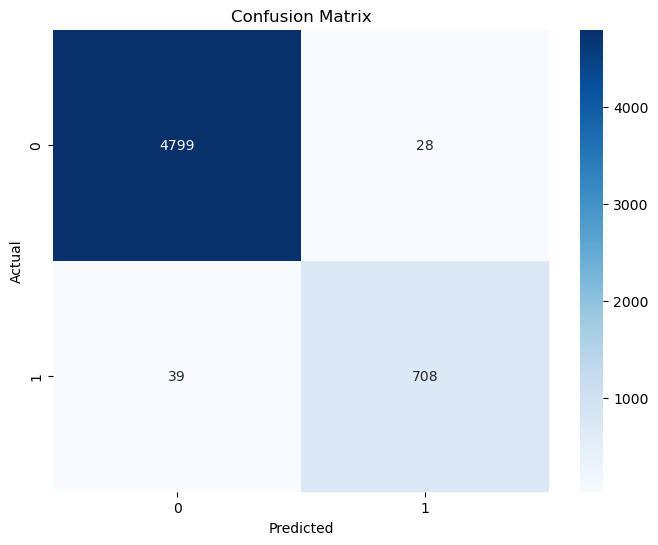

In [12]:
cm = confusion_matrix(Y, Y_Pred_Final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<h4> Logistic Regression training and testing</h4>

In [13]:
with warnings.catch_warnings():
    # Filter specific warnings (recommended)
    warnings.filterwarnings('ignore', category=ConvergenceWarning)
    warnings.filterwarnings('ignore', category=FitFailedWarning)
    Y_pred_log = cross_val_predict(LogReg, X, Y, cv=5)

In [14]:
precision_log = precision_score(Y, Y_pred_log, average='binary', pos_label=1)
recall_log = recall_score(Y, Y_pred_log, average='binary', pos_label=1)       
f1_log = f1_score(Y, Y_pred_log, average='binary', pos_label=1)               

print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1-score:", f1_log)

Precision: 0.9743589743589743
Recall: 0.9156626506024096
F1-score: 0.9440993788819876


In [15]:
with warnings.catch_warnings():
    # Filter specific warnings (recommended)
    warnings.filterwarnings('ignore', category=ConvergenceWarning)
    warnings.filterwarnings('ignore', category=FitFailedWarning)
    LogReg.fit(X,Y)
    Y_Pred_Log_Final = LogReg.predict(X)

In [16]:
precision_log_Final = precision_score(Y, Y_Pred_Log_Final, average='binary', pos_label=1)
recall_log_Final = recall_score(Y, Y_Pred_Log_Final, average='binary', pos_label=1)       
f1_log_Final = f1_score(Y, Y_Pred_Log_Final, average='binary', pos_label=1)               

print("Precision:", precision_log_Final)
print("Recall:", recall_log_Final)
print("F1-score:", f1_log_Final)

Precision: 0.9902370990237099
Recall: 0.9504685408299867
F1-score: 0.9699453551912568


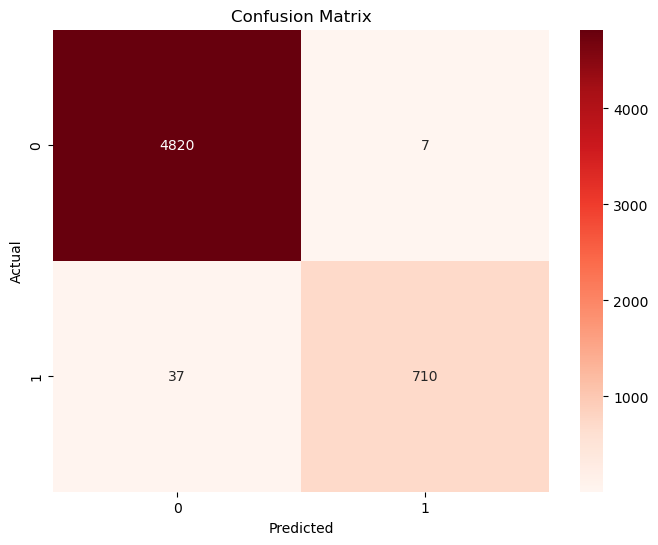

In [17]:
cm = confusion_matrix(Y, Y_Pred_Log_Final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<h4>  Side-by-side Bar Chart , Naive Bayes vs Logistic Regression ,Pre-SMOTE</h4>

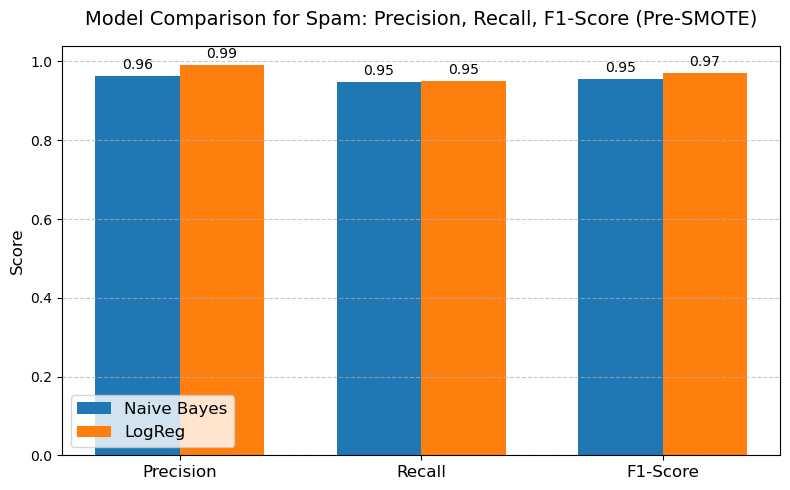

In [18]:
metrics = ['Precision', 'Recall', 'F1-Score']

Naive_Bayes_Scores = [precision_Bayes_Final,recall_Bayes_Final,f1_Bayes_Final]
LogReg_Scores = [precision_log_Final,recall_log_Final,f1_log_Final]

# Positions and width for bars
x = np.arange(len(metrics))  # [0, 1, 2]
width = 0.35  # Width of each bar

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bars_a = ax.bar(x - width/2, Naive_Bayes_Scores, width, label='Naive Bayes', color='#1f77b4')
bars_b = ax.bar(x + width/2, LogReg_Scores, width, label='LogReg', color='#ff7f0e')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Comparison for Spam: Precision, Recall, F1-Score (Pre-SMOTE)', fontsize=14, pad=15)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars_a)
add_labels(bars_b)

plt.tight_layout()
plt.show()



<h4> Summary of Pre-SMOTE modeling </h4>

Based on the model comparision bar chart, we can see that both the naive bayes and logistic regression model has done relatively well on the dataset. Overall, the logistic regression model has done the best. Recall measures how well the model is at **detecting** spam. Precision measures how well the model **labels** the spam it found.  

In this regard, F1-Score is particularly important in that is balances the precision and recall metrics. Lets continue the tsting and apply SMOTE.


<h3> SMOTE Modeling</h3>

In [19]:
# lets make new models to be used with smote
Bayes_SMOTE = MultinomialNB()
LogReg_SMOTE = LogisticRegression()

<h4> Naive Bayes training and testing (SMOTE)</h4>

In [20]:
# Lets initialize SMOTE , then apply it to our model as we make a pipeline classifier
smote = SMOTE(random_state = 42)
Bayes_Pipeline = make_pipeline(smote,Bayes_SMOTE)

In [21]:
# we will use stratifield K fold to preserve class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [22]:
# lets perform cross validation on our model
y_pred_Bayes = cross_val_predict(Bayes_Pipeline, X, Y, cv=cv, n_jobs=-1)

In [23]:
precision_Bayes_SMOTE = precision_score(Y, y_pred_Bayes, average='binary', pos_label=1)  
recall_Bayes_SMOTE = recall_score(Y, y_pred_Bayes, average='binary', pos_label=1)       
f1_Bayes_SMOTE = f1_score(Y, y_pred_Bayes, average='binary', pos_label=1)               

print("Precision:", precision_Bayes_SMOTE)
print("Recall:", recall_Bayes_SMOTE)
print("F1-score:", f1_Bayes_SMOTE)

Precision: 0.9373297002724795
Recall: 0.9210174029451138
F1-score: 0.9291019581363943


In [24]:
# LEts fit the model to the data and gather the metrics again
Bayes_Pipeline.fit(X,Y)
Y_Pred_SMOTE_Final = Bayes_Pipeline.predict(X)

In [25]:
precision_Bayes_SMOTE_Final = precision_score(Y, Y_Pred_SMOTE_Final, average='binary', pos_label=1)  
recall_Bayes_SMOTE_Final = recall_score(Y, Y_Pred_SMOTE_Final, average='binary', pos_label=1)       
f1_Bayes_SMOTE_Final = f1_score(Y, Y_Pred_SMOTE_Final, average='binary', pos_label=1)               

print("Precision:", precision_Bayes_SMOTE_Final)
print("Recall:", recall_Bayes_SMOTE_Final)
print("F1-score:", f1_Bayes_SMOTE_Final)

Precision: 0.952054794520548
Recall: 0.9303882195448461
F1-score: 0.9410968178740691


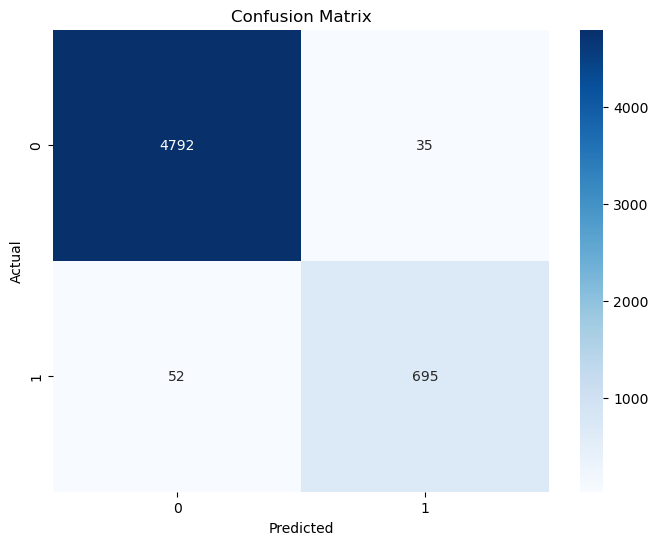

In [26]:
cm = confusion_matrix(Y, Y_Pred_SMOTE_Final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<h4> Logistic regression training and testing (SMOTE)</h4>

In [27]:
# Lets initialize SMOTE , then apply it to our model as we make a pipeline classifier
smote = SMOTE(random_state = 42)
LogReg_Pipeline = make_pipeline(smote,LogReg_SMOTE)

In [28]:
# we will use stratifield K fold to preserve class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
y_pred_log = cross_val_predict(LogReg_Pipeline, X, Y, cv=cv, n_jobs=-1)

In [30]:
precision_log_SMOTE = precision_score(Y, y_pred_log, average='binary', pos_label=1)  
recall_log_SMOTE = recall_score(Y, y_pred_log, average='binary', pos_label=1)       
f1_log_SMOTE = f1_score(Y, y_pred_log, average='binary', pos_label=1)               

print("Precision:", precision_log_SMOTE)
print("Recall:", recall_log_SMOTE)
print("F1-score:", f1_log_SMOTE)

Precision: 0.9006369426751593
Recall: 0.9464524765729585
F1-score: 0.922976501305483


In [31]:
with warnings.catch_warnings():
    # Filter specific warnings (recommended)
    warnings.filterwarnings('ignore', category=ConvergenceWarning)
    warnings.filterwarnings('ignore', category=FitFailedWarning)
    LogReg_Pipeline.fit(X,Y)
    Y_Log_Pred_SMOTE_Final = LogReg_Pipeline.predict(X)

In [32]:
precision_log_SMOTE_Final = precision_score(Y, Y_Log_Pred_SMOTE_Final, average='binary', pos_label=1)  
recall_log_SMOTE_Final = recall_score(Y, Y_Log_Pred_SMOTE_Final, average='binary', pos_label=1)       
f1_log_SMOTE_Final = f1_score(Y, Y_Log_Pred_SMOTE_Final, average='binary', pos_label=1)               

print("Precision:", precision_log_SMOTE_Final)
print("Recall:", recall_log_SMOTE_Final)
print("F1-score:", f1_log_SMOTE_Final)

Precision: 0.9628647214854111
Recall: 0.9718875502008032
F1-score: 0.9673550966022652


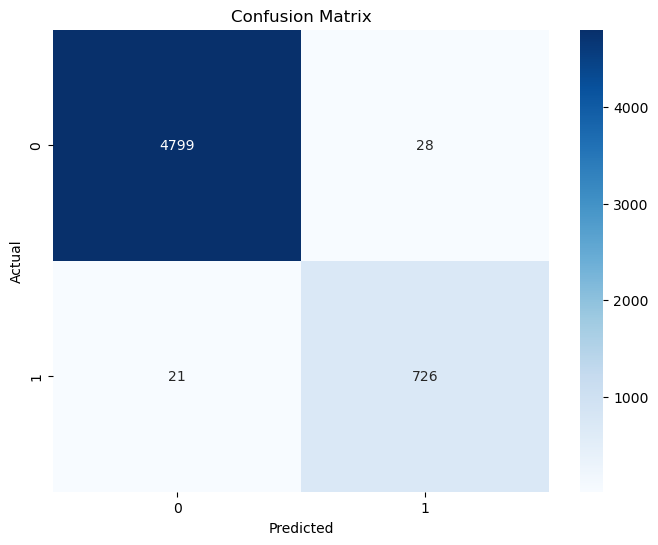

In [33]:
cm = confusion_matrix(Y, Y_Log_Pred_SMOTE_Final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<h4>  Side-by-side Bar Chart , Naive Bayes vs Logistic Regression , SMOTE</h4>

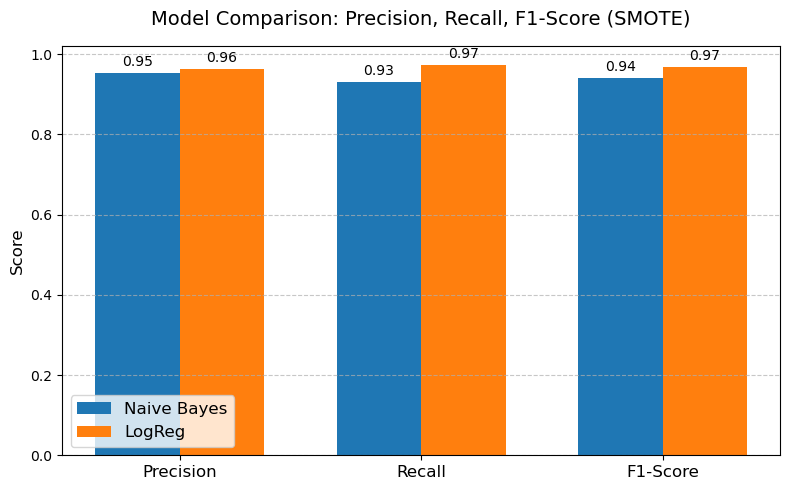

In [34]:
metrics = ['Precision', 'Recall', 'F1-Score']

Naive_Bayes_Scores_SMOTE = [precision_Bayes_SMOTE_Final,recall_Bayes_SMOTE_Final,f1_Bayes_SMOTE_Final]
LogReg_Scores_SMOTE = [precision_log_SMOTE_Final,recall_log_SMOTE_Final,f1_log_SMOTE_Final]

# Positions and width for bars
x = np.arange(len(metrics))  # [0, 1, 2]
width = 0.35  # Width of each bar

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bars_a = ax.bar(x - width/2, Naive_Bayes_Scores_SMOTE, width, label='Naive Bayes', color='#1f77b4')
bars_b = ax.bar(x + width/2, LogReg_Scores_SMOTE, width, label='LogReg', color='#ff7f0e')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Comparison: Precision, Recall, F1-Score (SMOTE)', fontsize=14, pad=15)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars_a)
add_labels(bars_b)

plt.tight_layout()
plt.show()



Based on what we can observe in the bar chart, SMOTE has not made a signficant change in the metrics for Precision, Recall and F1-Score. Based on this I would conclude that engineering enough robust features to describe the targeted class, we can effectively combat heavy class imbalance in the modeling phase.

<h4> Feature Importance</h4>

In [35]:
all_feature_names = X.columns.tolist()

In [36]:
all_feature_names[:5]

['num_chars',
 'num_words',
 'num_spec_chars',
 'num_digits',
 'num_Uppercase_Words']

In [37]:
# Create a DataFrame linking feature names to coefficients
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': LogReg.coef_[0]  # Use [0] for binary classification
})

# Top 10 spam-promoting features (highest positive coefficients)
top_spam = feature_importance.sort_values('Coefficient', ascending=False).head(10)

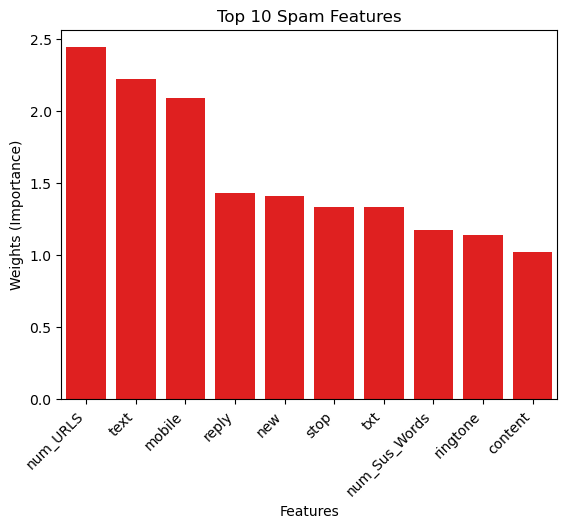

In [38]:
The_Features = top_spam['Feature']
Feature_weights = top_spam['Coefficient']
sns.barplot(x=The_Features,y=Feature_weights,color='red')

plt.xlabel('Features')
plt.ylabel('Weights (Importance)')
plt.title("Top 10 Spam Features")
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the chart, the primary indicator of spam, in this dataset, is the number of urls present in the message. This makes sense given that spam is one of the main mediums for cyberattacks such as Ransomware.

<h1>Conclusion</h1>

It seems that , for this dataset at least, training our model with or without SMOTE does result in a significant change in how well they fit the data as long we derive adequate enough features to distinguish between the two classes.   

I would say my hypothesis was proven true given that the most important feature for class distinction ( i.e. num_URLS) is a feature I made. Overall, this was a fun experiement.

To test my models further I have generated two new datasets with ChatGPT, one that is similar to the dataset used to train my model but with an even worse class imabalnce. The other datset contains adversial spam messages that a threat actor or hacker might use to gain access into a coproration and infect its systems.

<h1> Save the models</h1>

In [39]:
from joblib import dump

# lets save the models
dump(Bayes,'Bayes_Model.joblib')

['Bayes_Model.joblib']

In [40]:
dump(LogReg,'LogReg_Model.joblib')

['LogReg_Model.joblib']